# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
* Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [2]:
import numpy as np
import matplotlib as plt

# create training dataset
train_points = 1000
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 20

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Let's start by doing the linear Ridge Regression Model:

724.2189154898072


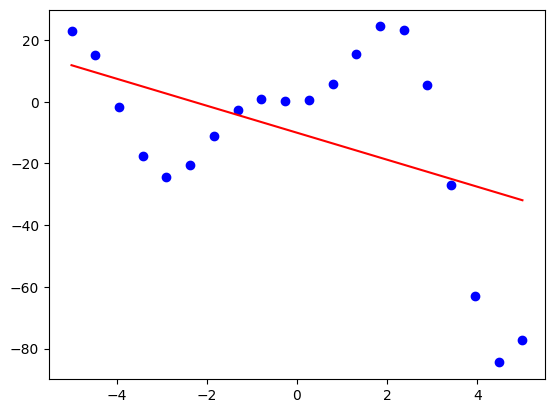

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge(alpha = 1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(rmse)
plt.pyplot.scatter(X_test, y_test, color='blue', label='Test Data')
plt.pyplot.plot(X_test, y_pred, color='red', label='Ridge Regression')

Now we try to make the Kernel Ridge Regression with the Gaussian Kernel

0.3898728458738691


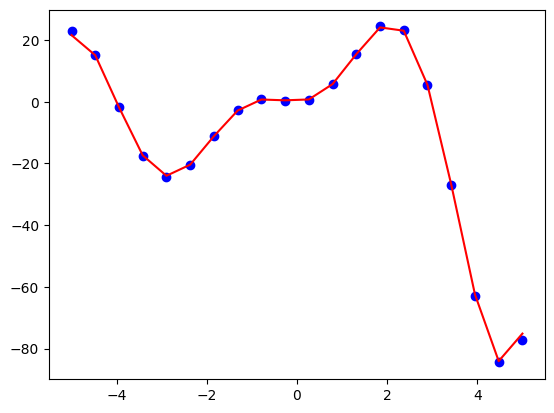

In [11]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(kernel='rbf', gamma=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(rmse)
plt.pyplot.scatter(X_test, y_test, color='blue', label='Test Data')
plt.pyplot.plot(X_test, y_pred, color='red', label='Kernel Ridge Regression')

Lastly the one: the kernel Ridge Regression with the polynomial kernel

147.03315509356767


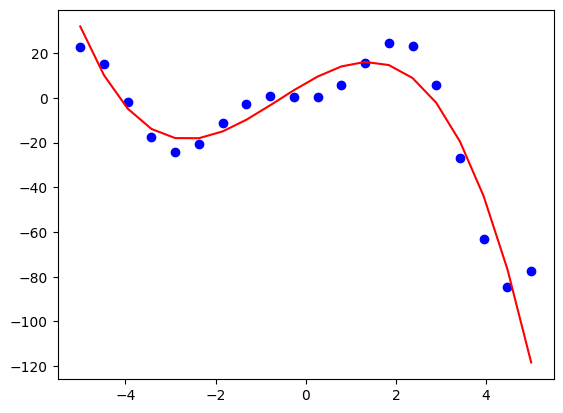

In [21]:
clf = KernelRidge(kernel='polynomial', gamma=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(rmse)
plt.pyplot.scatter(X_test, y_test, color='blue', label='Test Data')
plt.pyplot.plot(X_test, y_pred, color='red', label='Kernel Ridge Regression')

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [22]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

Let's start with the normal PCA:

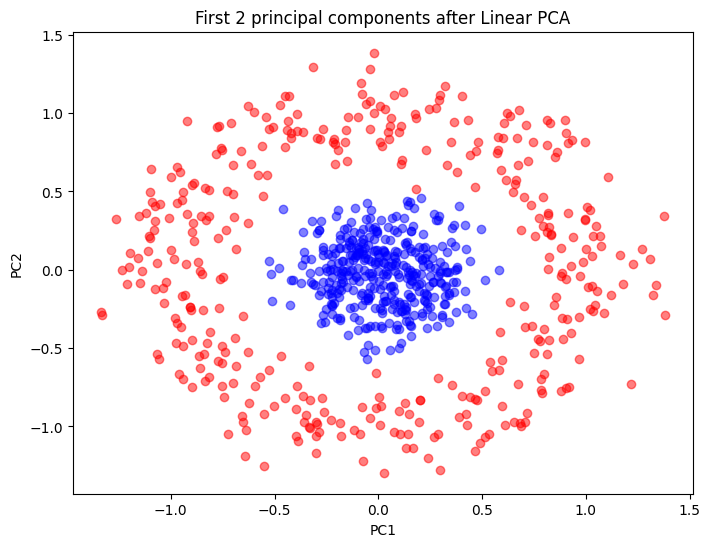

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y_train==0, 0], X_spca[y_train==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y_train==1, 0], X_spca[y_train==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

375


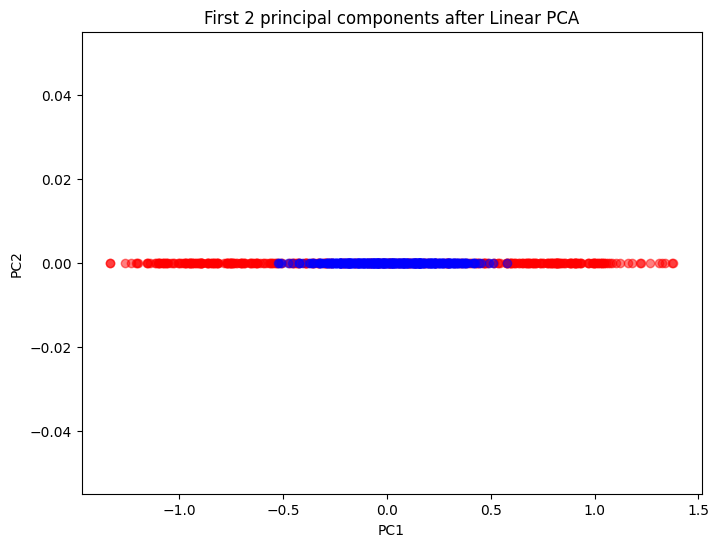

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y_train==0, 0], np.zeros((np.size(X_spca[y_train == 0, 0]), 1)), color='red', alpha=0.5)
plt.scatter(X_spca[y_train==1, 0], np.zeros((np.size(X_spca[y_train == 1, 0]), 1)), color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?